In [72]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [73]:
# load mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# check the shape of the data
print(X_train.shape) # 60000 images, 28x28 pixels
print(y_train.shape) # 60000 labels, 0-9
print(X_test.shape) # 10000 images, 28x28 pixels
print(y_test.shape) # 10000 labels, 0-9

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [74]:
X_train[0,:,7:20] # first image, 8th to 19th column

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

In [75]:
y_train[0] # first label

5

In [76]:
np.isnan(X_train).sum() # check for NaN values

0

In [77]:
print(np.unique(y_train)) # check the unique values of y_train
print(np.unique(y_test)) # check the unique values of y_test

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


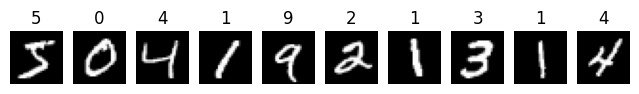

In [78]:
# visualize the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(8,4))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
    # axes[i].grid(True, color='w', linewidth=1, linestyle='-')

In [79]:
def visual_multi(i):
    '''Visualize the i-th image in X_train and y_train'''
    # print("Label: {}".format(y_train[i]))
    nplots = 40
    fig = plt.figure(figsize=(8,4))
    for j in range(nplots):
        ax = fig.add_subplot(4, 10, j+1, xticks=[], yticks=[])
        ax.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        ax.set_title(y_train[i+j])

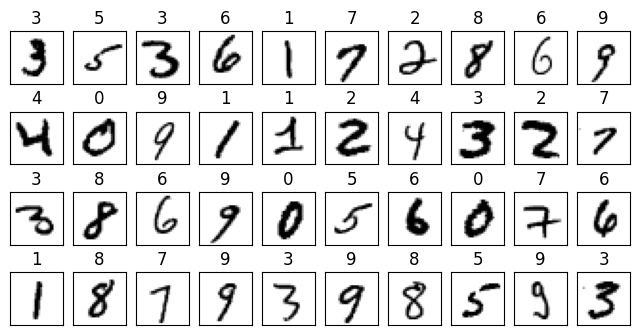

In [80]:
visual_multi(10)

In [81]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [82]:
# reshape
# X_train = X_train.reshape(60000, 28, 28, 1)
# or 
# X_train = X_train.reshape(-1, 28, 28, 1)
# or
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
# or
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [83]:
# normalize
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train.min(), X_test.max()

(0.0, 1.0)

In [84]:
num_sample = 10000

X_train = X_train[:num_sample]
y_train = y_train[:num_sample]

X_train.shape, y_train.shape

((10000, 28, 28, 1), (10000,))

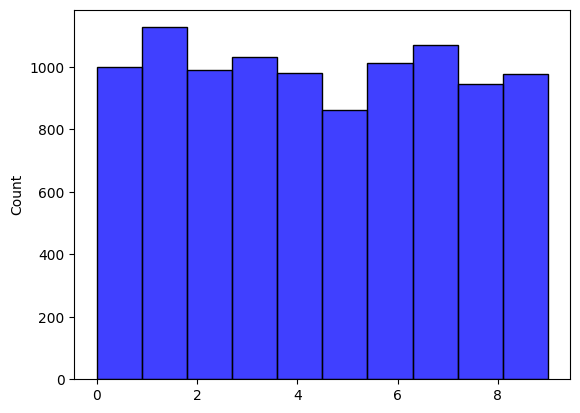

In [85]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.histplot(y_train, kde=False, color='b', bins=10)

del sns

In [86]:
# define class names
num_class = len(np.unique(y_train))
num_class

10

In [87]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [88]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_class, activation='softmax'))

model.summary()

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_8 (Dropout)         (None, 1600)             

In [89]:
import time
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start = time.time()

history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.1)

end = time.time()

print("Model took {} seconds to train".format(end - start))

Epoch 1/15
71/71 [==============================] - 2s 23ms/step - loss: 1.1077 - accuracy: 0.6449 - val_loss: 0.2879 - val_accuracy: 0.9170
Epoch 2/15
71/71 [==============================] - 2s 23ms/step - loss: 0.3530 - accuracy: 0.8921 - val_loss: 0.1775 - val_accuracy: 0.9470
Epoch 3/15
71/71 [==============================] - 2s 24ms/step - loss: 0.2431 - accuracy: 0.9282 - val_loss: 0.1339 - val_accuracy: 0.9590
Epoch 4/15
71/71 [==============================] - 2s 26ms/step - loss: 0.2005 - accuracy: 0.9393 - val_loss: 0.1142 - val_accuracy: 0.9680
Epoch 5/15
71/71 [==============================] - 2s 25ms/step - loss: 0.1676 - accuracy: 0.9518 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 6/15
71/71 [==============================] - 2s 29ms/step - loss: 0.1444 - accuracy: 0.9556 - val_loss: 0.0817 - val_accuracy: 0.9770
Epoch 7/15
71/71 [==============================] - 2s 31ms/step - loss: 0.1359 - accuracy: 0.9588 - val_loss: 0.0776 - val_accuracy: 0.9760
Epoch 8/15
71

In [90]:
# evaluate model
score = model.evaluate(X_test, y_test)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.4f}".format(score[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.0513 - accuracy: 0.9823
Test loss: 0.0513
Test accuracy: 0.9823


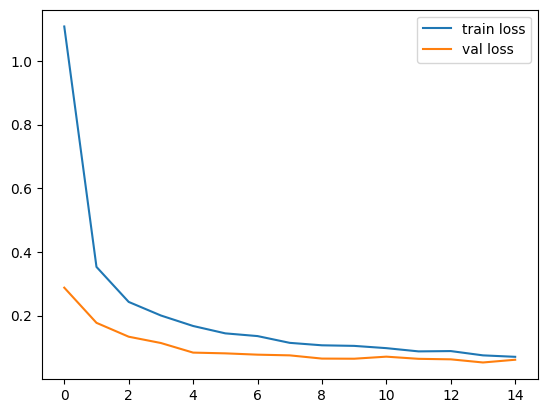

In [91]:
# loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

In [92]:
y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)

y_pred_cls

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [106]:
idx_miss = np.where(y_pred_cls != y_test)

print(len(idx_miss[0]))
print(idx_miss[0][:10])

# actual values
actual_test = y_test[idx_miss[0][:10]]
# predicted values
predicted = y_pred_cls[idx_miss][:10]

print(actual_test)
print(predicted)


177
[247 320 321 340 449 582 619 646 659 717]
[4 9 2 5 3 8 1 2 2 0]
[6 8 7 3 5 2 8 6 7 6]


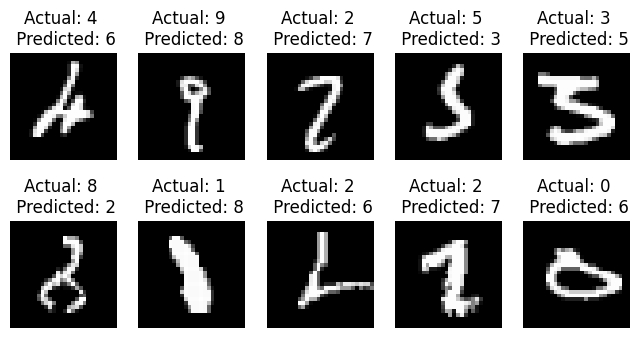

In [111]:
# visualize all the misclassified images
fig, axes = plt.subplots(2, 5, figsize=(8,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx_miss[0][i]], cmap='gray')
    ax.set_title("Actual: {} \n Predicted: {}".format(actual_test[i], predicted[i]))
    ax.axis('off')
    # ax.grid(True, color='w', linewidth=1, linestyle='-')
    

In [212]:
# predict on new data 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
from PIL import Image, ImageOps
import tensorflow as tf

(28, 28, 1)


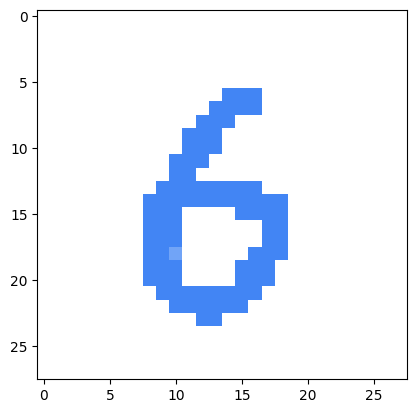

In [214]:
# load image
img = load_img('number/6.png', target_size=(28,28))
# show image
plt.imshow(img, cmap='gray')

# img = ImageOps.invert(img)
# img = img_to_array(img)

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)
img = img/255.0

print(img.shape)
# print(img.max())

In [215]:
# format for Conv2D
img = np.expand_dims(img, axis=0)
print(img.shape)

# predict
y_pred = model.predict(img)
print(y_pred.round(2))
predicted = np.argmax(y_pred, axis=1)
print(predicted)

(1, 28, 28, 1)
1/1 [==============================] - 0s 11ms/step
[[0.01 0.   0.   0.01 0.01 0.03 0.89 0.   0.04 0.01]]
[6]


In [216]:
# multi prediction
def predict_digit(imgs):
    y_pred = []; y_pred_cls = []; img_lst = []

    for i in imgs:
        img = load_img(i, target_size=(28,28))
        img = ImageOps.invert(img)
        img = img_to_array(img)
        img = rgb_to_grayscale(img)
        img = img/255.0
        img_lst.append(img)

        img = np.expand_dims(img, axis=0)
        y_pred_i = model.predict(img)
        y_pred_cls_i = np.argmax(y_pred_i, axis=-1)
        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred, y_pred_cls

In [217]:
imgfiles = ['number/0.png', 'number/1.png', 'number/2.png', 'number/3.png', 'number/4.png', 'number/5.png', 'number/6.png', 'number/7.png', 'number/8.png', 'number/9.png']
img_lst, y_pred, y_pred_cls = predict_digit(imgfiles)

1/1 [==============================] - 0s 10ms/step


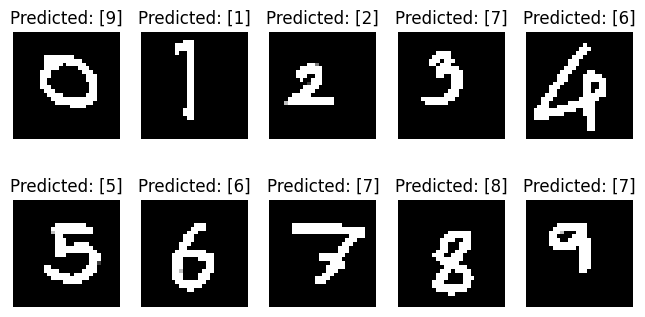

In [218]:
fig, axes = plt.subplots(2, 5, figsize=(8,4))

for i, ax in enumerate(axes.flat):
    ax.imshow(img_lst[i], cmap='gray')
    ax.set_title("Predicted: {}".format(y_pred_cls[i]))
    ax.axis('off')
    # ax.grid(True, color='w', linewidth=1, linestyle='-')

In [219]:
# save model
model.save('mnist.h5')
